In [1]:
#python package loading
import sys, platform, os
import matplotlib
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib import pyplot as plt

In [2]:
#camb package loading
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))
while True:
    try:
        pars = camb.CAMBparams()
        pars.set_cosmology(weylswitch=4)
        data= camb.get_background(pars)
        ev = data.get_time_evolution(ks, eta, 'appscal')
        print("error handling process incorrect")
        break
    except:
        print("error handling process correct")
        break

Using CAMB 1.1.0 installed at /mnt/c/Users/cosmo/Desktop/paper_revision/CosmoMC/camb/camb
error handling process correct


In [3]:
#main computation

pars_zee = [0,0,0,0,0]
results_zee = [0,0,0,0,0]
data_zee = [0,0,0,0,0]
powers_zee = [0,0,0,0,0]
totCL_zee = [0,0,0,0,0]
unlensedCL_zee = [0,0,0,0,0]

pars_weyl = [0,0,0,0,0]
results_weyl = [0,0,0,0,0]
data_weyl = [0,0,0,0,0]
powers_weyl = [0,0,0,0,0]
totCL_weyl = [0,0,0,0,0]
unlensedCL_weyl = [0,0,0,0,0]
    
pars_gr = [0,0,0,0,0]
results_gr = [0,0,0,0,0]
data_gr = [0,0,0,0,0]
powers_gr = [0,0,0,0,0]
totCL_gr = [0,0,0,0,0]
unlensedCL_gr = [0,0,0,0,0]

for i in [0,1,2,3,4]:
    pars_zee[i] = camb.CAMBparams()
    pars_zee[i].set_cosmology(H0=67.32117, ombh2=0.0223828, omch2=0.1201075, tau=0.0543, omk=0, scalmass=10**(-6+i)*(4*3.14159265359*6.67384*1e-11), weylswitch=2)
    results_zee[i] = camb.get_results(pars_zee[i])
    data_zee[i] = camb.get_background(pars_zee[i])
    powers_zee[i] = results_zee[i].get_cmb_power_spectra(pars_zee[i], CMB_unit='muK')
    totCL_zee[i] = powers_zee[i]['total']
    unlensedCL_zee[i] = powers_zee[i]['unlensed_scalar']
print("model A computed")
for i in [0,1,2,3,4]:
    pars_weyl[i] = camb.CAMBparams()
    pars_weyl[i].set_cosmology(H0=67.32117, ombh2=0.0223828, omch2=0.1201075, tau=0.0543,omk=0, scalmass=10**(-6+i)*(4*3.14159265359*6.67384*1e-11), weylswitch=1)
    results_weyl[i] = camb.get_results(pars_weyl[i])
    data_weyl[i] = camb.get_background(pars_weyl[i])
    powers_weyl[i] = results_weyl[i].get_cmb_power_spectra(pars_weyl[i], CMB_unit='muK')
    totCL_weyl[i] = powers_weyl[i]['total']
    unlensedCL_weyl[i] = powers_weyl[i]['unlensed_scalar']
print("model B computed")
for i in [0,1,2,3,4]:
    pars_gr[i] = camb.CAMBparams()
    pars_gr[i].set_cosmology(H0=67.32117, ombh2=0.0223828, omch2=0.1201075, tau=0.0543, omk=0, scalmass=10**(-6)*(4*3.14159265359*6.67384*1e-11), weylswitch=3)
    results_gr[i] = camb.get_results(pars_gr[i])
    data_gr[i] = camb.get_background(pars_gr[i])
    powers_gr[i] = results_gr[i].get_cmb_power_spectra(pars_gr[i], CMB_unit='muK')
    totCL_gr[i] = powers_gr[i]['total']
    unlensedCL_gr[i] = powers_gr[i]['unlensed_scalar']
print("gr case computed")

model A computed
model B computed
gr case computed


No handles with labels found to put in legend.


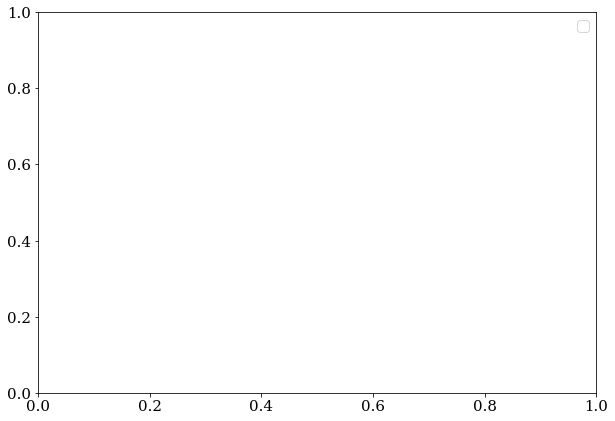

In [4]:
#graph setting
plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams.update({'font.size': 15,'font.family': 'serif'})
mpl.rc('lines', linewidth=1)
leg = plt.legend()
my_path = os.path.abspath("/mnt/c/Users/cosmo/Desktop/paper_revision/plotsave/")

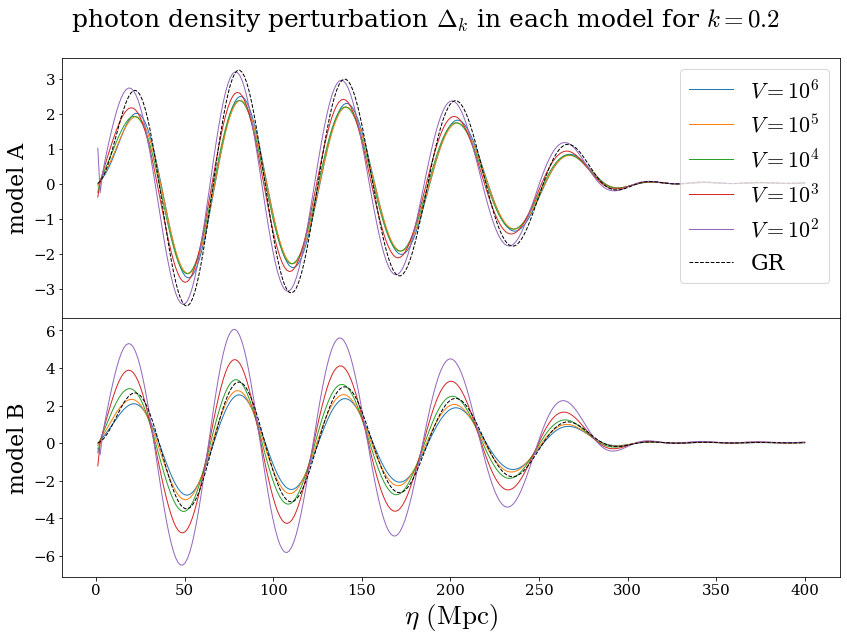

In [6]:
#photon perturbation graph

plt.rcParams["figure.figsize"] = (12,9)

eta = np.linspace(1, 400, 300)
ks = 0.2

ev1 = data_zee[0].get_time_evolution(ks, eta, 'delta_photon')
ev2 = data_zee[1].get_time_evolution(ks, eta, 'delta_photon')
ev3 = data_zee[2].get_time_evolution(ks, eta, 'delta_photon')
ev4 = data_zee[3].get_time_evolution(ks, eta, 'delta_photon')
ev5 = data_zee[4].get_time_evolution(ks, eta, 'delta_photon')
ev6 = data_gr[2].get_time_evolution(ks, eta, 'delta_photon')

ev7 = data_weyl[0].get_time_evolution(ks, eta, 'delta_photon')
ev8 = data_weyl[1].get_time_evolution(ks, eta, 'delta_photon')
ev9 = data_weyl[2].get_time_evolution(ks, eta, 'delta_photon')
ev10 = data_weyl[3].get_time_evolution(ks, eta, 'delta_photon')
ev11 = data_weyl[4].get_time_evolution(ks, eta, 'delta_photon')
ev12 = data_gr[2].get_time_evolution(ks, eta, 'delta_photon')

fig, ax = plt.subplots(2, sharex='col')

ax[0].plot(eta,ev1)
ax[0].plot(eta,ev2)
ax[0].plot(eta,ev3)
ax[0].plot(eta,ev4)
ax[0].plot(eta,ev5)
ax[0].plot(eta,ev6, linestyle = 'dashed', color='black')
ax[0].set_ylabel('model A',fontsize=22)
ax[0].legend([r'$V = 10^{6}$', r'$V = 10^{5}$', r'$V = 10^{4}$', r'$V = 10^{3}$', r'$V = 10^{2}$', 'GR'], loc = 'upper right',fontsize=22);

ax[1].plot(eta,ev7)
ax[1].plot(eta,ev8)
ax[1].plot(eta,ev9)
ax[1].plot(eta,ev10)
ax[1].plot(eta,ev11)
ax[1].plot(eta,ev12, linestyle = 'dashed', color='black')
ax[1].set_xlabel(r'$\eta$ $(\rm{Mpc})$',fontsize=27)
ax[1].set_ylabel('model B',fontsize=22)
#ax[1].legend([r'$V_B = 10^{6}$', r'$V_B = 10^{5}$', r'$V_B = 10^{4}$', r'$V_B = 10^{3}$', r'$V_B = 10^{2}$', 'GR'], loc = 'upper right',fontsize=20);

fig.suptitle(r'photon density perturbation $\Delta_k$ in each model for $k=0.2$',fontsize=25)

plt.subplots_adjust(left = 0.08, bottom = 0.1, right = 0.98, top = 0.9, hspace = 0, wspace = 0)

plt.savefig(my_path + '/photon_field_revised.png')

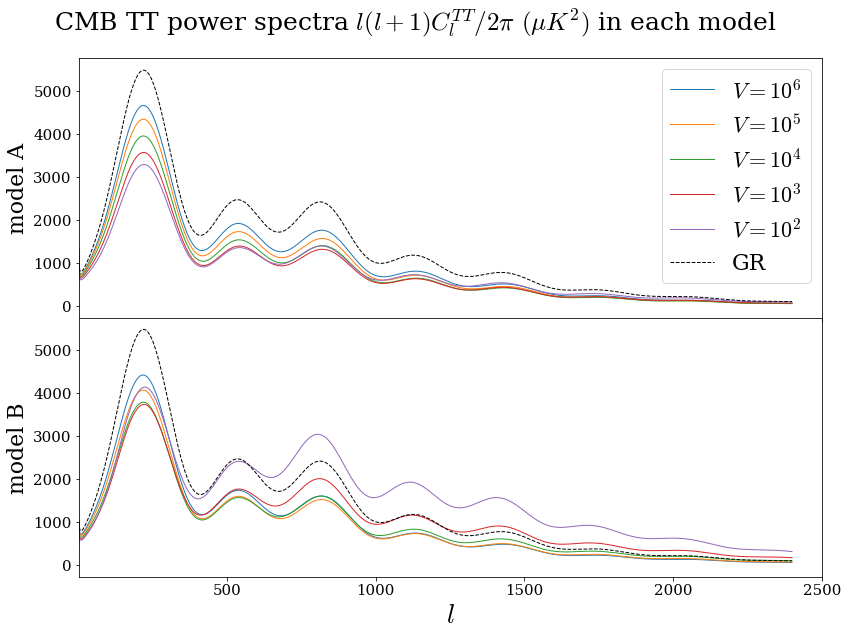

In [9]:
#TT graph

plt.rcParams["figure.figsize"] = (12,9)

ls = np.arange(totCL_zee[1].shape[0])

fig, ax = plt.subplots(2, sharex='col')

ax[0].plot(ls,totCL_zee[0][:,0], linestyle = 'solid')
ax[0].plot(ls,totCL_zee[1][:,0], linestyle = 'solid')
ax[0].plot(ls,totCL_zee[2][:,0], linestyle = 'solid')
ax[0].plot(ls,totCL_zee[3][:,0], linestyle = 'solid')
ax[0].plot(ls,totCL_zee[4][:,0], linestyle = 'solid')
ax[0].plot(ls,totCL_gr[1][:,0], linestyle = 'dashed', color='black')
ax[0].set_ylabel(r'model A',fontsize=22)
ax[0].legend([r'$V = 10^{6}$', r'$V = 10^{5}$', r'$V = 10^{4}$', r'$V = 10^{3}$', r'$V = 10^{2}$', 'GR'], loc = 'upper right',fontsize=22);

ax[1].plot(ls,totCL_weyl[0][:,0], linestyle = 'solid')
ax[1].plot(ls,totCL_weyl[1][:,0], linestyle = 'solid')
ax[1].plot(ls,totCL_weyl[2][:,0], linestyle = 'solid')
ax[1].plot(ls,totCL_weyl[3][:,0], linestyle = 'solid')
ax[1].plot(ls,totCL_weyl[4][:,0], linestyle = 'solid')
ax[1].plot(ls,totCL_gr[1][:,0], linestyle = 'dashed', color='black')
ax[1].set_xlabel(r'$l$',fontsize=27)
ax[1].set_ylabel(r'model B',fontsize=22)

fig.suptitle(r'CMB TT power spectra $l(l+1)C_l^{TT}/2 \pi$ $(\mu K^2)$ in each model',fontsize=25)

plt.subplots_adjust(left = 0.11, bottom = 0.1, right = 0.97, top = 0.9, hspace = 0, wspace = 0)

plt.xlim(2,2500)

plt.savefig(my_path + '/TT_revised.png')

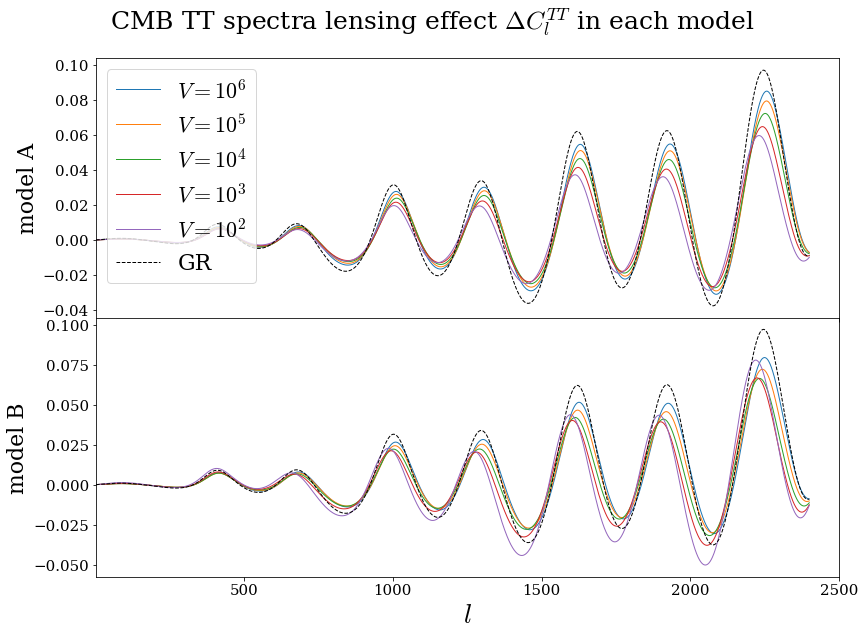

In [13]:
#TT lensing graph

plt.rcParams["figure.figsize"] = (12,9)

ls = np.arange(totCL_zee[1].shape[0])

fig, ax = plt.subplots(2, sharex='col')

ax[0].plot(ls[2:],1-unlensedCL_zee[0][2:,0]/totCL_zee[0][2:,0])
ax[0].plot(ls[2:],1-unlensedCL_zee[1][2:,0]/totCL_zee[1][2:,0])
ax[0].plot(ls[2:],1-unlensedCL_zee[2][2:,0]/totCL_zee[2][2:,0])
ax[0].plot(ls[2:],1-unlensedCL_zee[3][2:,0]/totCL_zee[3][2:,0])
ax[0].plot(ls[2:],1-unlensedCL_zee[4][2:,0]/totCL_zee[4][2:,0])
ax[0].plot(ls[2:],1-unlensedCL_gr[1][2:,0]/totCL_gr[1][2:,0], linestyle = 'dashed', color='black')
ax[0].set_ylabel(r'model A',fontsize=22)
ax[0].legend([r'$V = 10^{6}$', r'$V = 10^{5}$', r'$V = 10^{4}$', r'$V = 10^{3}$', r'$V = 10^{2}$', 'GR'], loc = 'upper left',fontsize=22)

ax[1].plot(ls[2:],1-unlensedCL_weyl[0][2:,0]/totCL_weyl[0][2:,0])
ax[1].plot(ls[2:],1-unlensedCL_weyl[1][2:,0]/totCL_weyl[1][2:,0])
ax[1].plot(ls[2:],1-unlensedCL_weyl[2][2:,0]/totCL_weyl[2][2:,0])
ax[1].plot(ls[2:],1-unlensedCL_weyl[3][2:,0]/totCL_weyl[3][2:,0])
ax[1].plot(ls[2:],1-unlensedCL_weyl[4][2:,0]/totCL_weyl[4][2:,0])
ax[1].plot(ls[2:],1-unlensedCL_gr[1][2:,0]/totCL_gr[1][2:,0], linestyle = 'dashed', color='black')
ax[1].set_xlabel(r'$l$',fontsize=27)
ax[1].set_ylabel(r'model B',fontsize=22)

fig.suptitle(r'CMB TT spectra lensing effect $\Delta C_l^{TT}$ in each model',fontsize=25)

plt.subplots_adjust(left = 0.11, bottom = 0.1, right = 0.97, top = 0.9, hspace = 0, wspace = 0)

plt.xlim(2,2500)

plt.savefig(my_path + '/TT_lensing_revised.png')

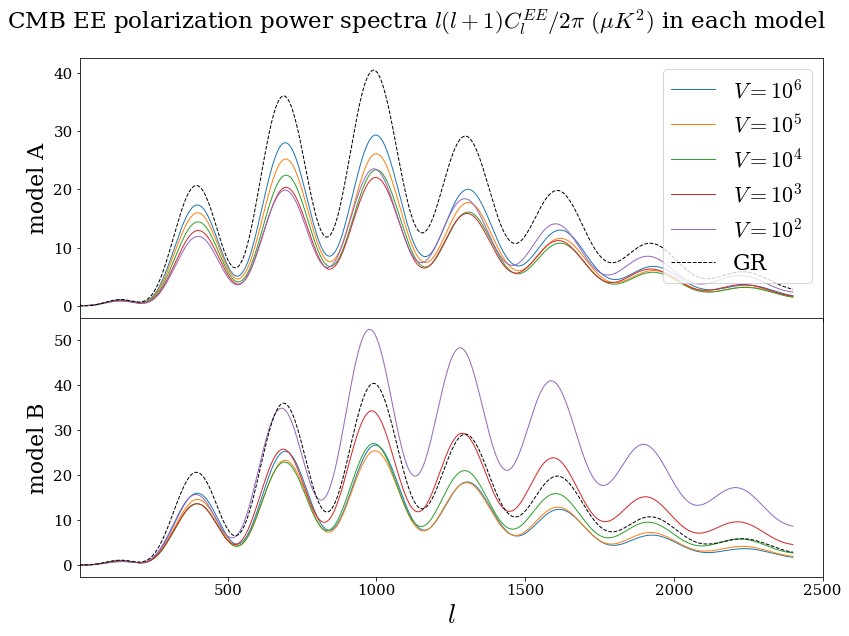

In [17]:
#EE graph

plt.rcParams["figure.figsize"] = (12,9)

ls = np.arange(totCL_zee[1].shape[0])

fig, ax = plt.subplots(2, sharex='col')

ax[0].plot(ls,totCL_zee[0][:,1], linestyle = 'solid')
ax[0].plot(ls,totCL_zee[1][:,1], linestyle = 'solid')
ax[0].plot(ls,totCL_zee[2][:,1], linestyle = 'solid')
ax[0].plot(ls,totCL_zee[3][:,1], linestyle = 'solid')
ax[0].plot(ls,totCL_zee[4][:,1], linestyle = 'solid')
ax[0].plot(ls,totCL_gr[1][:,1], linestyle = 'dashed', color='black')
ax[0].set_ylabel(r'model A',fontsize=22)
ax[0].legend([r'$V = 10^{6}$', r'$V = 10^{5}$', r'$V = 10^{4}$', r'$V = 10^{3}$', r'$V = 10^{2}$', 'GR'], loc = 'upper right',fontsize=22)

ax[1].plot(ls,totCL_weyl[0][:,1], linestyle = 'solid')
ax[1].plot(ls,totCL_weyl[1][:,1], linestyle = 'solid')
ax[1].plot(ls,totCL_weyl[2][:,1], linestyle = 'solid')
ax[1].plot(ls,totCL_weyl[3][:,1], linestyle = 'solid')
ax[1].plot(ls,totCL_weyl[4][:,1], linestyle = 'solid')
ax[1].plot(ls,totCL_gr[1][:,1], linestyle = 'dashed', color='black')
ax[1].set_xlabel(r'$l$',fontsize=27)
ax[1].set_ylabel(r'model B',fontsize=22)

fig.suptitle(r'CMB EE polarization power spectra $l(l+1)C_l^{EE}/2 \pi$ $(\mu K^2)$ in each model',fontsize=23)

plt.subplots_adjust(left = 0.11, bottom = 0.1, right = 0.97, top = 0.9, hspace = 0, wspace = 0)

plt.xlim(2,2500)

plt.savefig(my_path + '/EE_revised.png')

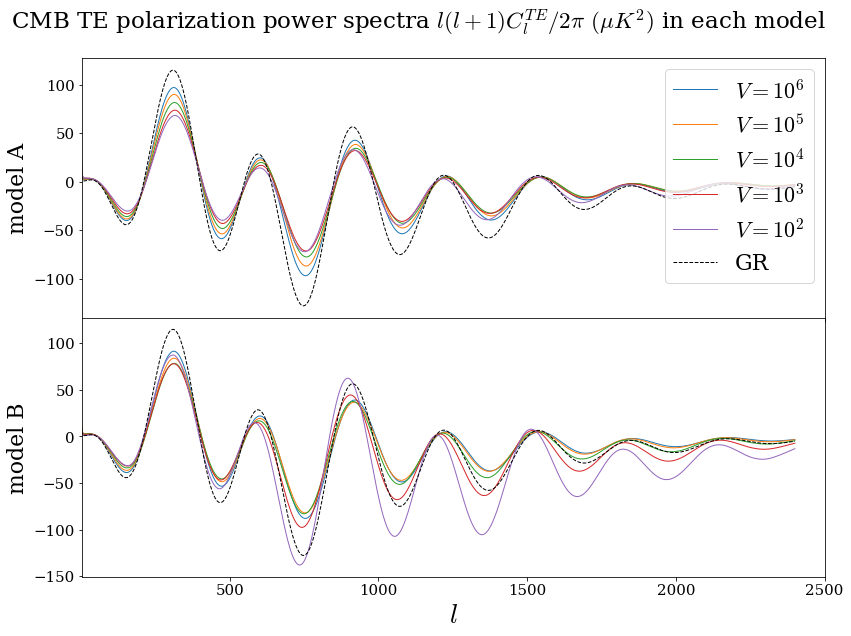

In [19]:
#TE graph

plt.rcParams["figure.figsize"] = (12,9)

ls = np.arange(totCL_zee[1].shape[0])

fig, ax = plt.subplots(2, sharex='col')

ax[0].plot(ls,totCL_zee[0][:,3], linestyle = 'solid')
ax[0].plot(ls,totCL_zee[1][:,3], linestyle = 'solid')
ax[0].plot(ls,totCL_zee[2][:,3], linestyle = 'solid')
ax[0].plot(ls,totCL_zee[3][:,3], linestyle = 'solid')
ax[0].plot(ls,totCL_zee[4][:,3], linestyle = 'solid')
ax[0].plot(ls,totCL_gr[1][:,3], linestyle = 'dashed', color='black')
ax[0].set_ylabel(r'model A',fontsize=22)
ax[0].legend([r'$V = 10^{6}$', r'$V = 10^{5}$', r'$V = 10^{4}$', r'$V = 10^{3}$', r'$V = 10^{2}$', 'GR'], loc = 'upper right',fontsize=22)

ax[1].plot(ls,totCL_weyl[0][:,3], linestyle = 'solid')
ax[1].plot(ls,totCL_weyl[1][:,3], linestyle = 'solid')
ax[1].plot(ls,totCL_weyl[2][:,3], linestyle = 'solid')
ax[1].plot(ls,totCL_weyl[3][:,3], linestyle = 'solid')
ax[1].plot(ls,totCL_weyl[4][:,3], linestyle = 'solid')
ax[1].plot(ls,totCL_gr[1][:,3], linestyle = 'dashed', color='black')
ax[1].set_xlabel(r'$l$',fontsize=27)
ax[1].set_ylabel(r'model B',fontsize=22)

fig.suptitle(r'CMB TE polarization power spectra $l(l+1)C_l^{TE}/2 \pi$ $(\mu K^2)$ in each model',fontsize=23)

plt.subplots_adjust(left = 0.11, bottom = 0.1, right = 0.97, top = 0.9, hspace = 0, wspace = 0)

plt.xlim(2,2500)

plt.savefig(my_path + '/TE_revised.png')

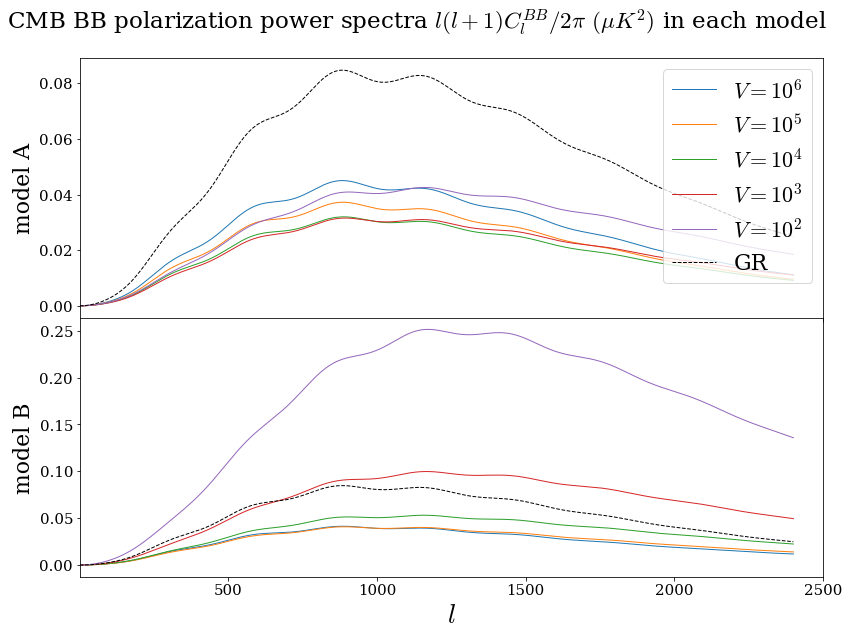

In [20]:
#TE graph

plt.rcParams["figure.figsize"] = (12,9)

ls = np.arange(totCL_zee[1].shape[0])

fig, ax = plt.subplots(2, sharex='col')

ax[0].plot(ls,totCL_zee[0][:,2], linestyle = 'solid')
ax[0].plot(ls,totCL_zee[1][:,2], linestyle = 'solid')
ax[0].plot(ls,totCL_zee[2][:,2], linestyle = 'solid')
ax[0].plot(ls,totCL_zee[3][:,2], linestyle = 'solid')
ax[0].plot(ls,totCL_zee[4][:,2], linestyle = 'solid')
ax[0].plot(ls,totCL_gr[1][:,2], linestyle = 'dashed', color='black')
ax[0].set_ylabel(r'model A',fontsize=22)
ax[0].legend([r'$V = 10^{6}$', r'$V = 10^{5}$', r'$V = 10^{4}$', r'$V = 10^{3}$', r'$V = 10^{2}$', 'GR'], loc = 'upper right',fontsize=22)

ax[1].plot(ls,totCL_weyl[0][:,2], linestyle = 'solid')
ax[1].plot(ls,totCL_weyl[1][:,2], linestyle = 'solid')
ax[1].plot(ls,totCL_weyl[2][:,2], linestyle = 'solid')
ax[1].plot(ls,totCL_weyl[3][:,2], linestyle = 'solid')
ax[1].plot(ls,totCL_weyl[4][:,2], linestyle = 'solid')
ax[1].plot(ls,totCL_gr[1][:,2], linestyle = 'dashed', color='black')
ax[1].set_xlabel(r'$l$',fontsize=27)
ax[1].set_ylabel(r'model B',fontsize=22)

fig.suptitle(r'CMB BB polarization power spectra $l(l+1)C_l^{BB}/2 \pi$ $(\mu K^2)$ in each model',fontsize=23)

plt.subplots_adjust(left = 0.11, bottom = 0.1, right = 0.97, top = 0.9, hspace = 0, wspace = 0)

plt.xlim(2,2500)

plt.savefig(my_path + '/BB_revised.png')